In [2]:
import pandas as pd

# Load iris dataset
df = pd.read_csv("Iris.csv")

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Checking for Duplicate Values. To drop all repeated rows based "Species"
data = df.drop_duplicates(subset ="Species",)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [11]:
# Checking for Duplicate Rows based on subset ="Species"
duplicate_rows = data[df.duplicated(subset ="Species")]
print(duplicate_rows)

Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


/tmp/ipykernel_166344/2825227553.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_rows = data[df.duplicated(subset ="Species")]


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_166344/438960792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette='Set1')


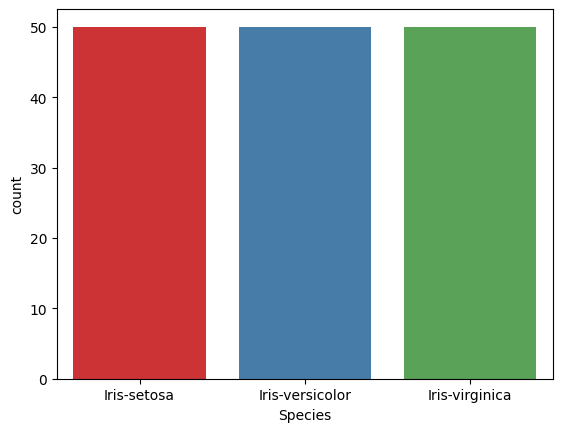

In [26]:
# countplot for the target column - Species
sns.countplot(x='Species', data=df, palette='Set1')
plt.show()

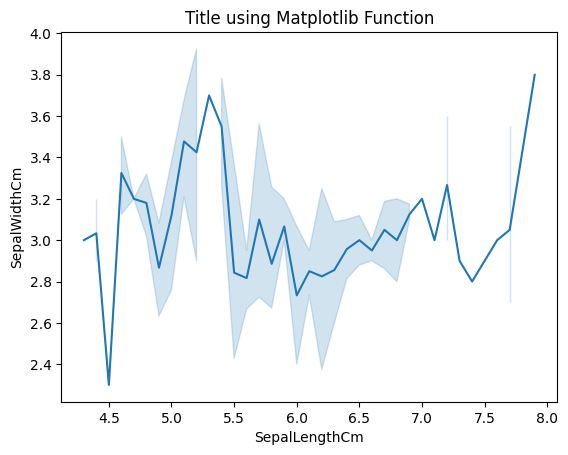

In [17]:
# draw lineplot
sns.lineplot(x="SepalLengthCm", y="SepalWidthCm", data=df)

# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

plt.show()

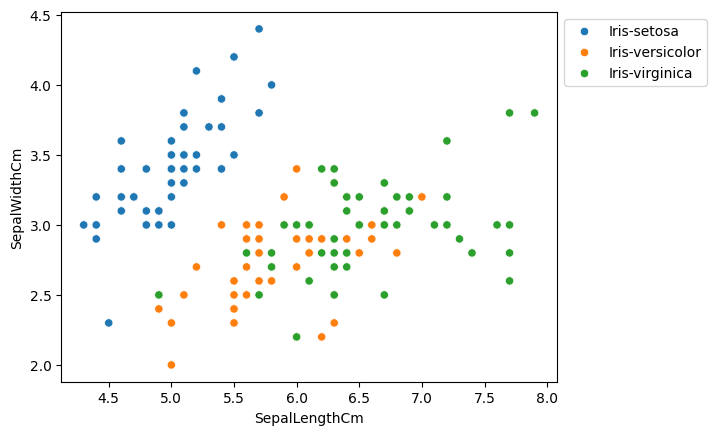

In [18]:
# Show the relationship between the sepal length and sepal width
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

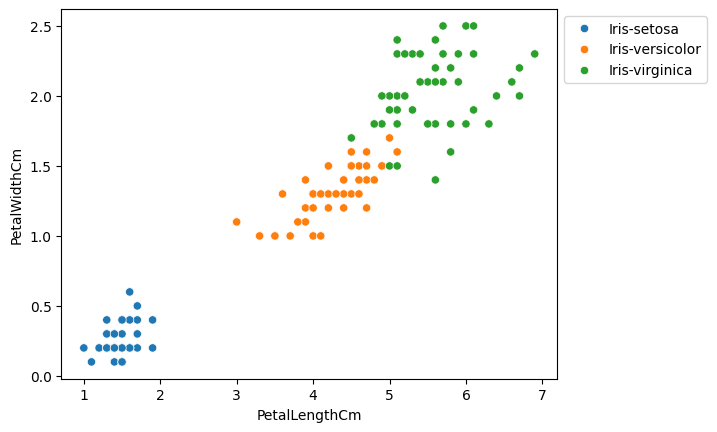

In [19]:
 # Show the relationship between the petal length and petal width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

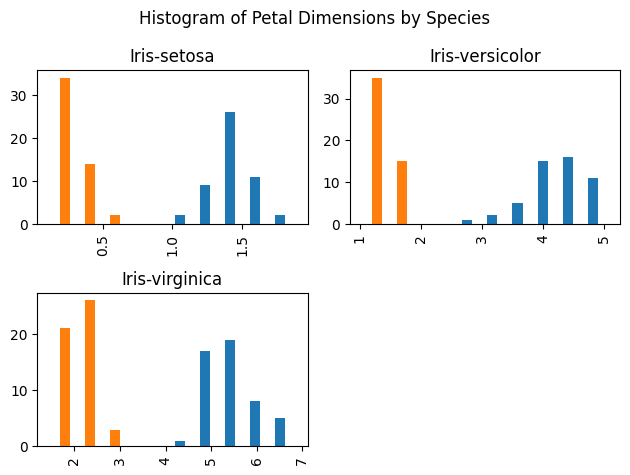

In [22]:
df.hist(column=['PetalLengthCm', 'PetalWidthCm'], by=df['Species'])
plt.suptitle("Histogram of Petal Dimensions by Species")
plt.tight_layout()
plt.show()

Finding: Setosa has the smallest petal length and width distributions.

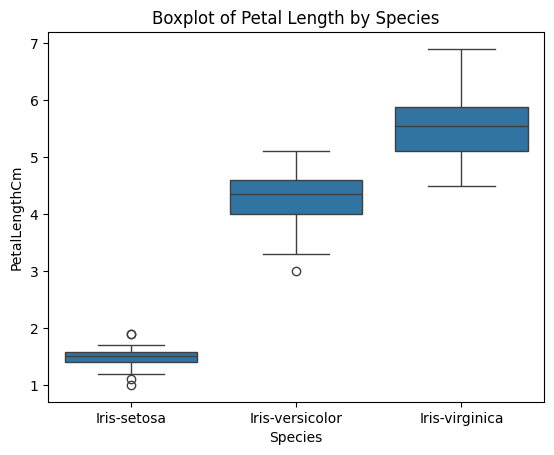

In [23]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title("Boxplot of Petal Length by Species")
plt.show()

Finding: Setosa’s petals are significantly smaller and less variable.

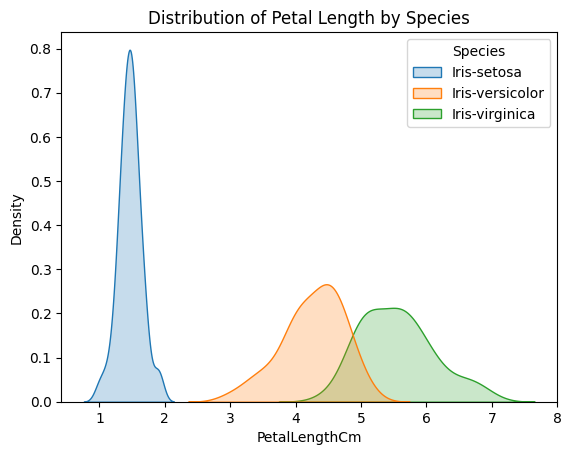

In [24]:
sns.kdeplot(data=df, x='PetalLengthCm', hue='Species', fill=True)
plt.title("Distribution of Petal Length by Species")
plt.show()

Finding: Petal length clearly separates species, especially Virginica.

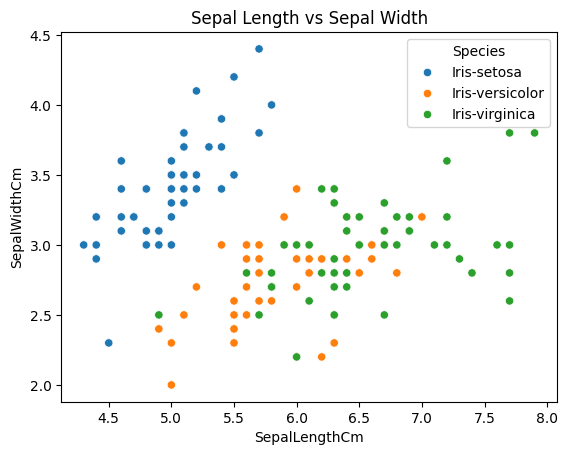

In [25]:
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title("Sepal Length vs Sepal Width")
plt.show()

Finding: Sepal dimensions overlap across species, making them weaker predictors.

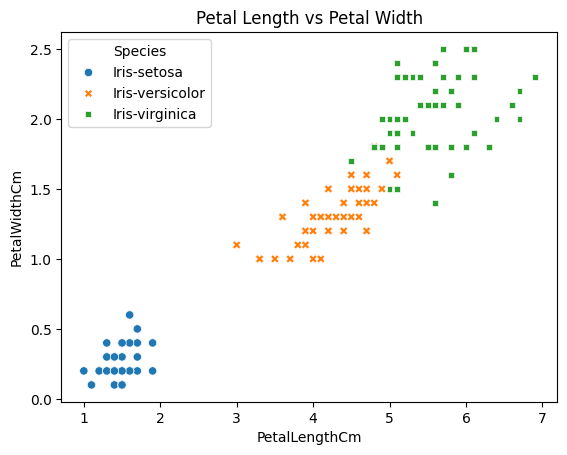

In [27]:
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', style='Species')
plt.title("Petal Length vs Petal Width")
plt.show()

Finding: Petal dimensions clearly separate species.

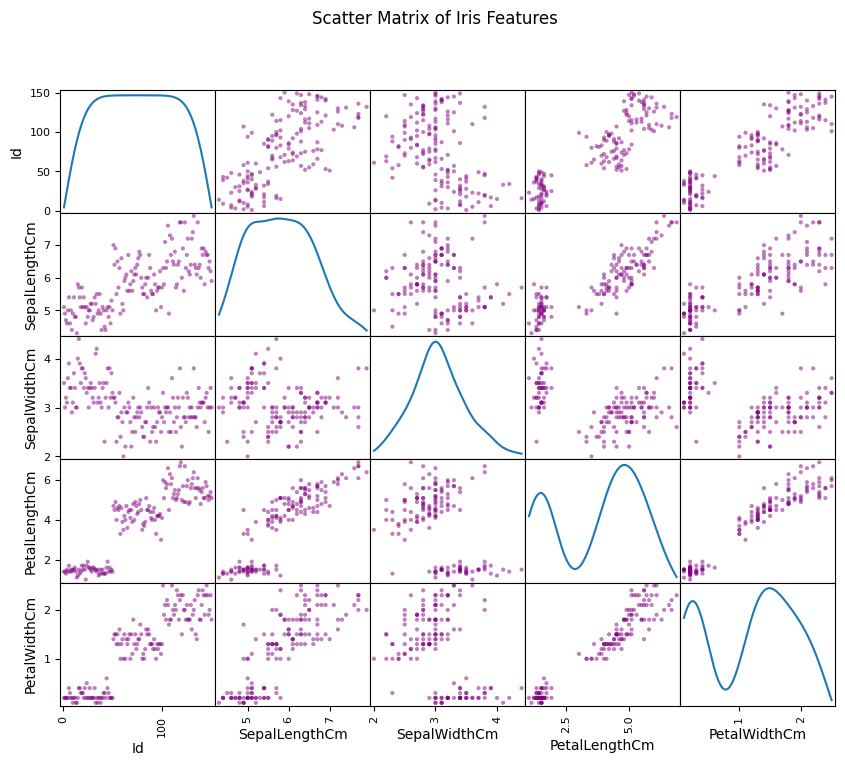

In [36]:

from pandas.plotting import scatter_matrix

scatter_matrix(df.drop(columns=['Species']), figsize=(10, 8), diagonal='kde', color='purple')
plt.suptitle("Scatter Matrix of Iris Features")
plt.show()

Finding: Petal features show clearer separation than sepal features.

In [38]:
import plotly.express as px

fig = px.scatter(df, x='PetalLengthCm', y='PetalWidthCm',
                 size='SepalLengthCm', color='Species',
                 title="Bubble Chart: Petal Dimensions with Sepal Size")
fig.show()

Finding: Virginica has larger petals and sepals, Setosa the smallest.

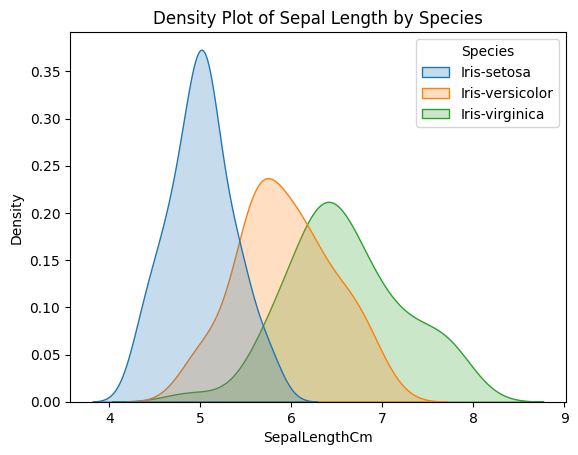

In [30]:
sns.kdeplot(data=df, x='SepalLengthCm', hue='Species', fill=True)
plt.title("Density Plot of Sepal Length by Species")
plt.show()

Finding: Sepal length varies but overlaps across species.

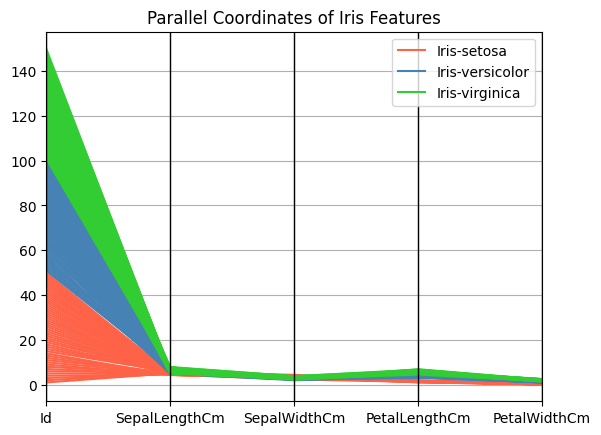

In [39]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, 'Species', color=['#FF6347', '#4682B4', '#32CD32'])
plt.title("Parallel Coordinates of Iris Features")
plt.show()

Finding: Petal features show clearer separation paths across species.

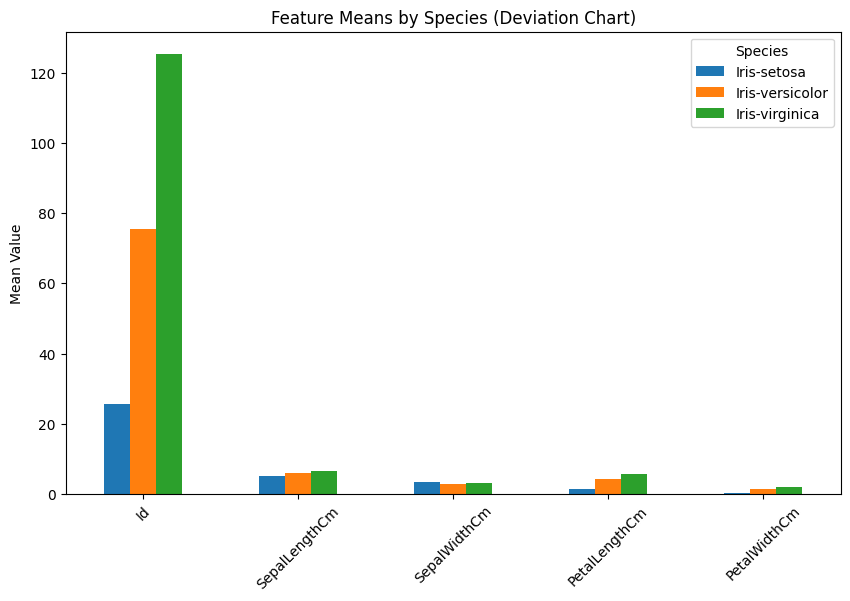

In [32]:
feature_means = df.groupby('Species').mean()
feature_means.T.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Means by Species (Deviation Chart)")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()

Finding: Virginica shows highest values across most features.

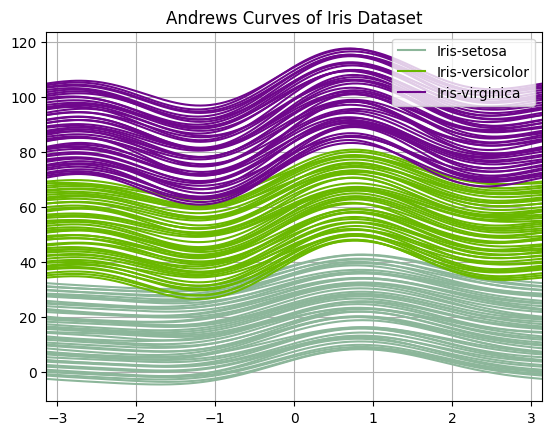

In [35]:
from pandas.plotting import andrews_curves

andrews_curves(df, 'Species')
plt.title("Andrews Curves of Iris Dataset")
plt.show()

Finding: Petal features drive the curve separation across species.

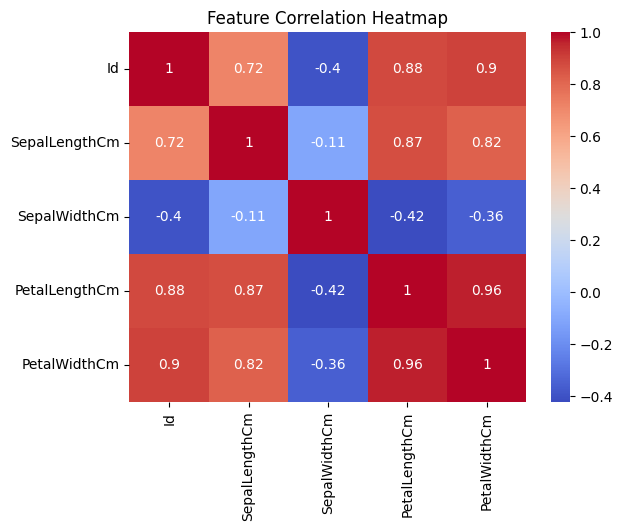

In [34]:
corr = df.drop(columns=['Species']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

 Finding: Petal length and petal width are most positively correlated.